In [1]:
import csv
import math
import numpy as np
import pandas as pd
import random
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
#suppress warnings
warnings.filterwarnings('ignore')
# Set up the constants
mu_0 = 4 * math.pi * 1e-7  # Permeability of free space

# Set up the parameters for the data
I_values = np.linspace(10,50,5)  # Values of I to use


In [2]:
x=np.linspace(-40,40,5)    # x-position of the testing point
y=np.linspace(-40,40,5)    # y-position of the testing point
H=np.linspace(10,50,5)     # Height of the wire

# coeffcients of the line given by the equation ax+by+c=0
a=[-4,-3,-2,2,3,4]   
b=[-4,-3,-2,2,3,4]   
c=[-4,-3,-2,2,3,4]   


In [3]:

# Create the header row for the CSV file
header_row = ['I', 'H', 'X', 'Y', 'a', 'b', 'c', 'B']

# Create a list to store the rows of data
data_rows = []

# Loop over the I and R values and calculate the corresponding B values
for I in I_values:
  for n in H:
    for m in x:
      for j in y:
        for q in a:
          for w in b:
            for e in c:
              R=np.abs(q*m+w*j+e)/np.sqrt(q**2+w**2)
              B = mu_0 * I / (2 * math.pi * np.sqrt(R**2+n**2))
              data_rows.append([I, n, m, j, q, w, e, B])

# Write the data to a CSV file
with open('biot_savart_data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(header_row)
    writer.writerows(data_rows)

data=pd.read_csv('biot_savart_data.csv', sep=',')
#data=preprocessing.normalize(data)
data=(data-data.mean())/data.std()
data

,I,H,X,Y,a,b,c,B
0,-1.414208,-1.414208,-1.414208,-1.414208,-1.28653,-1.28653,-1.286530,-1.009141
1,-1.414208,-1.414208,-1.414208,-1.414208,-1.28653,-1.28653,-0.964898,-1.009892
2,-1.414208,-1.414208,-1.414208,-1.414208,-1.28653,-1.28653,-0.643265,-1.010638
3,-1.414208,-1.414208,-1.414208,-1.414208,-1.28653,-1.28653,0.643265,-1.013579
4,-1.414208,-1.414208,-1.414208,-1.414208,-1.28653,-1.28653,0.964898,-1.014303
...,...,...,...,...,...,...,...,...
134995,1.414208,1.414208,1.414208,1.414208,1.28653,1.28653,-0.964898,-0.326841
134996,1.414208,1.414208,1.414208,1.414208,1.28653,1.28653,-0.643265,-0.328469
134997,1.414208,1.414208,1.414208,1.414208,1.28653,1.28653,0.643265,-0.334947
134998,1.414208,1.414208,1.414208,1.414208,1.28653,1.28653,0.964898,-0.336557


In [4]:
I_noise = np.random.normal(np.mean(np.array(data['I'])),1,400)
X_noise = np.random.normal(np.mean(np.array(data['X'])),1,400)
H_noise = np.random.normal(np.mean(np.array(data['H'])),1,400)
Y_noise = np.random.normal(np.mean(np.array(data['Y'])),1,400)
a_noise = np.random.normal(np.mean(np.array(data['a'])),1,400)
b_noise = np.random.normal(np.mean(np.array(data['b'])),1,400)
c_noise = np.random.normal(np.mean(np.array(data['c'])),1,400)
B_noise = np.random.normal(np.mean(np.array(data['B'])),1,400)
noise=pd.DataFrame({'I': I_noise, 'H': H_noise, 'X': X_noise, 'Y': Y_noise, 'a':a_noise, 'b':b_noise, 'c':c_noise, 'B': B_noise})
data=data.append(noise, ignore_index=True)
data=np.array(data)
print(len(data))

135400


In [5]:

# Split the data into training and testing sets
num_training_samples = 70000
X=[[row[0], row[1], row[2], row[3], row[4], row[5], row[6]] for row in data]
y=[row[7] for row in data]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
# Create the regression models
RFC=RandomForestRegressor()
# Fit the regression models iteratively
train_sizes = range(1000, num_training_samples, 1000)
losses = []
model_losses = []
n=0
for train_size in train_sizes:
  X_trainn = np.array(X_train[:train_size])
  y_trainn = np.array(y_train[:train_size])
  RFC.fit(X_trainn, y_trainn)
  y_pred = RFC.predict(X_test)
  loss = mean_squared_error(y_test, y_pred)
  losses.append(loss)
  print(f'Iteration {n}:',loss)
  n+=1

# 7m


Iteration 0: 0.36508742471654165
Iteration 1: 0.3614545774192536
Iteration 2: 0.3409061184871988
Iteration 3: 0.30266010802042914
Iteration 4: 0.2933272523361578
Iteration 5: 0.27709166274046887
Iteration 6: 0.26565486951094847
Iteration 7: 0.24967538355031738
Iteration 8: 0.2354674110369504
Iteration 9: 0.22097930615578038
Iteration 10: 0.2105251361471471
Iteration 11: 0.19820758275775557
Iteration 12: 0.19772818666801661
Iteration 13: 0.1898072372843188
Iteration 14: 0.18177492188681052
Iteration 15: 0.1683779458797321
Iteration 16: 0.16207935152880912
Iteration 17: 0.14940382274703592
Iteration 18: 0.14406652262466846
Iteration 19: 0.1406321478649429
Iteration 20: 0.1340689025060211
Iteration 21: 0.12644884082487767
Iteration 22: 0.12346078529543014
Iteration 23: 0.1159543702980142
Iteration 24: 0.11244222019983055
Iteration 25: 0.10821839231563173
Iteration 26: 0.10548072360979308
Iteration 27: 0.1000066656513577
Iteration 28: 0.09610610294263218
Iteration 29: 0.09214532032660407
I

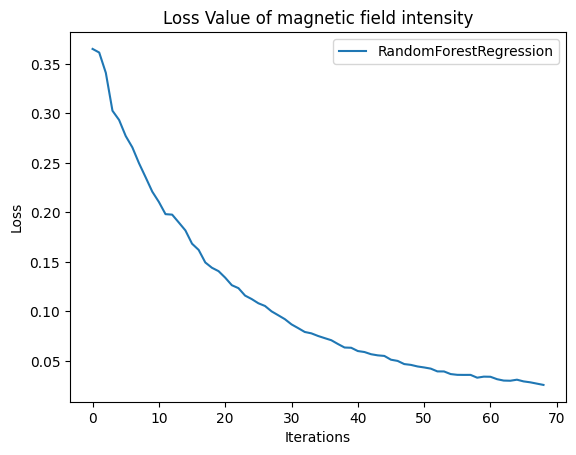

In [6]:
# Plot model losses
plt.plot(losses, label='RandomForestRegression')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Value of magnetic field intensity")
plt.legend(loc="upper right")

plt.show()


In [7]:
# Predict on testing data using trained models, and calculate the test  mean square error of each model


pred=RFC.predict(X_test)
regression_mse = mean_squared_error(y_test, pred)
print("mean square error:", regression_mse)
acc=0
for i in range(len(pred)):
  if abs(pred[i]==y_test[i])<=0.1:
    acc+=1
print("accuracy:", acc/len(pred))


mean square error: 0.025736343238922845
accuracy: 1.0


In [8]:
I_losses = []
X=[[row[1], row[2], row[3], row[4], row[5], row[6], row[7]] for row in data]
y=[row[0] for row in data]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
n=0
for train_size in train_sizes:
  X_trainn = np.array(X_train[:train_size])
  y_trainn = np.array(y_train[:train_size])
  RFC.fit(X_trainn, y_trainn)
  y_pred = RFC.predict(X_test)
  loss = mean_squared_error(y_test, y_pred)
  I_losses.append(loss)
  print(f'{n}',loss)
  n+=1

0 0.18354014995295415
1 0.15472076796583942
2 0.14057122341762862
3 0.12882966291809728
4 0.1201977635579391
5 0.11456142564907895
6 0.10987956186340453
7 0.10334046048020382
8 0.09834975683856886
9 0.09676694936070485
10 0.0915185499196144
11 0.08761616580042403
12 0.08472314378718927
13 0.08090293697144546
14 0.07757843932347754
15 0.07328545434196543
16 0.07137557967594114
17 0.06929488593692072
18 0.06568655224941447
19 0.06356341641936833
20 0.06197524883391974
21 0.06003239929919903
22 0.05900240556590235
23 0.056431838082075865
24 0.05515045786797466
25 0.05379964171983124
26 0.05193541941125319
27 0.05075854302374375
28 0.04880872013751515
29 0.0475476422034674
30 0.046367866445671486
31 0.04596283937605124
32 0.044448605704239835
33 0.04390076616640257
34 0.04208976621100114
35 0.04059690566442576
36 0.03932919602941346
37 0.038179019733159854
38 0.03652431258433724
39 0.036717709525408086
40 0.035496763320369676
41 0.03470957572588832
42 0.03386052155185748
43 0.0318117983850

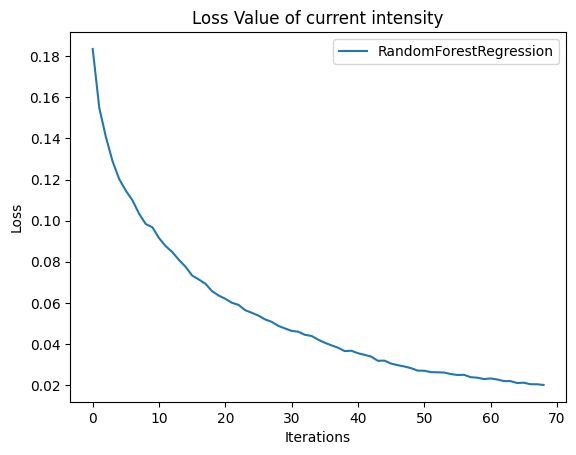

In [9]:
# Plot model losses

plt.plot(I_losses, label='RandomForestRegression')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Value of current intensity")
plt.legend(loc="upper right")

plt.show()

In [10]:
# Predict on testing data using trained models, and calculate the test mean square error of each model

pred=RFC.predict(X_test)
regression_mse = mean_squared_error(y_test, pred)
print("mean square error:", regression_mse)
acc=0
for i in range(len(pred)):
  if abs(pred[i]-y_test[i])<=0.1:
    acc+=1
print("accuracy:", acc/len(pred))



mean square error: 0.020073660551809647
accuracy: 0.8553175775480059
